In [0]:
#!pip install sympy

# Derivative

Compute the derivative of a function using sympy

In [0]:
from sympy import *
x, y, z = symbols('x y z')

## Newton method 

find the root of the function using Newton

$$x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)}{f^{\prime}\left(x_{n}\right)}$$

In [0]:
def newton(f,Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> Df = lambda x: 2*x - 1
    >>> newton(f,Df,1,1e-8,10)
    Found solution after 5 iterations.
    1.618033988749989
    '''
    xn = x0
    i = 0
    list_iter = []
    list_f = []
    list_x = []
    
    for n in range(0,max_iter):
        fxn = f(xn)
        Dfxn = Df(xn)
        xn = xn - fxn/Dfxn
        
        list_f.append(fxn)
        list_x.append(xn)
        list_iter.append(i)
        dic_df = {
        'iter': list_iter,
        'x': list_x,
        'fx': list_f
    }
        if abs(fxn) < epsilon:
            #print('Found solution after',n,'iterations.')
            x0 =  xn
            import pandas as pd
            df = pd.DataFrame(dic_df)
            return df, x0
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
        #xn = xn - fxn/Dfxn
        i += 1
    
    #print('Exceeded maximum iterations. No solution found.')

### Example

Find x when $f(x) =0$

$f(x)=x^{3}-x^{2}-1$

In [0]:
diff(x**3 - x**2 - 1, x)

3*x**2 - 2*x

In [0]:
f = lambda x: x**3 - x**2 - 1
Df = lambda x: 3*x**2 - 2*x
approx = newton(f,Df,1,1e-10,10)
print(approx[1])

1.465571231876768


In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.scatterplot(x="iter", y="fx", data=approx[0])

### Example 2

$f(x)=6 x^{5}-5 x^{4}-4 x^{3}+3 x^{2}$

In [0]:
diff(6*x**5 - 5*x**4 - 4*x**3 + 3*x**2, x)

30*x**4 - 20*x**3 - 12*x**2 + 6*x

In [0]:
f = lambda x: 6*x**5 - 5*x**4 - 4*x**3 + 3*x**2
Df = lambda x: 30*x**4 - 20*x**3 - 12*x**2 + 6*x
approx = newton(f,Df,1.5,1e-5,10)
print(approx[1])

0.9999999999999999


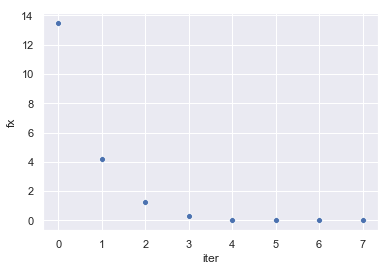

In [0]:
sns.scatterplot(x="iter", y="fx", data=approx[0])

In [0]:
from scipy import optimize
optimize.newton(f, 1.5)

1.0000000000000002

## Multivariate Newton method

To summarize the multivariate Newton-Raphson method: 
Suppose $$f : \mathbb{R}^{k} \rightarrow \mathbb{R}$$ is twice continuously differentiable. 

- Pick an initial value $x_{0}=a$
- Let $ x_{t+1}=x_{t}-H^{-1} \nabla f\left(x_{t}\right)$ where  $H=\nabla^{2} f\left(x_{t}\right)$

- $f$ attains a max at the x-value to which the sequence $\left\{x_{0}, x_{1}, \ldots\right\}$ converges.  

- $\beta^{(t+1)}=\beta^{(t)}-H^{-1} \nabla L\left(\beta^{(t)}\right)$
  - where : $H=\nabla^{2} L\left(\beta^{(t)}\right)$
- $\beta^{(t+1)}=\beta^{(t)}-\left(-Z^{T} W Z\right)^{-1} Z^{T}(\boldsymbol{y}-\boldsymbol{p})$
- $\beta^{(t+1)}=\left(Z^{T} W Z\right)^{-1}\left(Z^{T} W\right) v$
  - where: $\boldsymbol{v}=Z \beta^{(t)}+W^{-1}(\boldsymbol{y}-\boldsymbol{p})$

This method is then called iterative reweighted least squares. At each iteration, $\beta^{(t)}$ gets updated, and so do $\boldsymbol{p}, W$, and $\boldsymbol{v}$.


### Example Maximizing log likelihood function

- Find the log-likelihood function $L(\beta)$.
- Apply iterative reweighted least squares to find estimates for $\beta_{0}, \beta_{1}, \beta_{2}$
- Find the estimated probability function $\hat{p}(x)$, where $p(x)=\operatorname{Pr}(Y=1 | X=x)$
- Classify the new point $x=(5,0)$ using $\hat{p}(x)$

Log likelihood function:

$$L(\beta)=\sum_{i=1}^{N}\left[y_{i} \beta^{T} z_{i}^{\prime}-\log \left(1+e^{\beta^{T} z_{i}^{\prime}}\right)\right]$$



In [0]:
def log_likelihood(y, beta, Z):
  LL = np.sum(y * np.transpose(beta) * Z -
            np.log(1 + np.exp(np.transpose(beta) * Z)))
  return LL

In [0]:
max_iterations = 5


def netwon_raphson(Z, y, beta, max_iteration):
  iteration = 0
  LL_current = log_likelihood(y, beta, Z)
  LL_delta = 1
  list_LL = []
  list_iter = []
  while (abs(LL_delta) > 0.001 and iteration < max_iterations):
    p = np.exp(np.sum(np.transpose(beta) * Z, axis = 1)) / \
      (1 + np.exp(np.sum(np.transpose(beta) * Z, axis = 1)))
    one_p = 1 / (1 + np.exp(np.sum(np.transpose(beta) * Z, axis = 1)))
    W = np.zeros((len(Z), len(Z)))
    i = 0
    #for j in range(0, len(Z)):
    #  W[i,i] = p[j] * one_p[j]
    #  i +=1
    np.fill_diagonal(W, p * one_p)
    v = np.sum(Z * beta, axis =1) + np.diagonal(np.linalg.inv(W) * (y - p)) 
    beta = np.dot(np.dot(np.linalg.inv(np.dot(np.dot(np.transpose(Z), W), Z)),
              np.matmul(np.transpose(Z), W)) , v)
    LL_new = log_likelihood(y, beta, Z)
    LL_delta = LL_current - LL_new
    LL_current = LL_new
    iteration += 1
    list_LL.append(LL_delta)
    list_iter.append(iteration)
  dic_nr = {
      'x': list_iter,
      'list_LL': list_LL
  }
  df = pd.DataFrame(dic_nr)
  #print(iteration, beta, LL_delta)
  return beta, df


In [0]:
import numpy as np
import pandas as pd
Z = np.array([
    [1, 1, 3],
    [1, 2, 4],
    [1, 4, 1],
    [1, 3, 1],
    [1, 4, 2],
    ])

y = np.array([
    [0],
    [0],
    [0],
    [1],
    [1]
])

groups =  ['Yes', 'No']
colors = ['red', 'blue']
beta = np.array([0,
        0, 
        0
       ])
Z.shape, len(Z)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [0]:
max_iteration = 5
beta, df = netwon_raphson(Z, y, beta, max_iteration)
sns.scatterplot(x="x", y="list_LL", data=df)

### More complex example

In [0]:
col_name = ["age", "workClass", "fnlwgt", "education", "education_lenght",
            "marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss",
            "hours-per-week", "native-country", "income"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/"+ \
                 "adult/adult.data", names = col_name)
df = df.dropna()

In [0]:
df_sample = df.sample(frac=0.25, replace=False, random_state=1)
df_sample.shape

(8140, 15)

In [0]:
income = {' <=50K': 0, ' >50K': 1}
dic_q = {'income': income}
for key, value in dic_q.items():
    df_sample = df_sample.replace({key: value})
Z = df_sample[['age', 'education_lenght', 'capital-gain']]
y = df_sample['income']

In [0]:
np_z = Z.to_numpy()
### Add intercept
np_z = np.insert(np_z, 0, 1, axis=1)
np_y = y.to_numpy()
np_y = np.expand_dims(np_y, axis=1)

In [0]:
np_z.shape

(8140, 4)

Very slow.. 

In [0]:
beta = np.array([0,
        0, 
        0,
        0
       ])
max_iteration = 1
beta, df = netwon_raphson(np_z, np_y, beta, max_iteration)

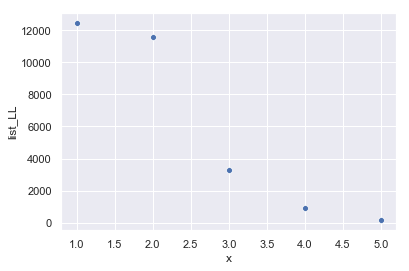

In [0]:
sns.scatterplot(x="x", y="list_LL", data=df)

In [0]:
beta

array([-6.81547352e+00,  4.16745478e-02,  3.49938181e-01,  2.90476748e-04])

In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(np_y,np_z)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.417542
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.218    
Dependent Variable: y                AIC:              6805.5827
Date:               2019-04-09 17:34 BIC:              6833.6009
No. Observations:   8140             Log-Likelihood:   -3398.8  
Df Model:           3                LL-Null:          -4348.0  
Df Residuals:       8136             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
const   -6.8160     0.1886   -36.1438   0.0000   -7.1857   -6.4464
x1       0.0417     0.0023    18.0175   0.0000    0.0371    0.0462
x2 